# Processing Pipeline

### Import Data

In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('four_class_anomaly_detection.csv')

# Display the first few rows to ensure it was loaded correctly
df.head()

,AIL1,AIL2,AOAC,BAL,CAS,CRSS,DA,ELEV1,FLAP,GLS,...,N2,PT,PTCH,ROLL,RUDD,TH,VRTG,WS,Label,FlightID
0,81.261190,82.652336,-8.111792,1969.6174,155.57140,-2.109358,-0.692778,-4.952854,3065.0,0.01794,...,70.74118,985.42550,-3.662262,0.785912,-0.390141,-1.081870,0.972379,12.625183,0,1
1,79.604095,81.015700,-7.644611,1955.6995,154.51205,-2.109358,-0.867216,-5.198349,3065.0,0.01950,...,70.71775,985.52030,-3.665276,0.046774,-0.756234,-0.704820,0.770077,11.893839,0,1
2,81.302110,80.770200,-7.552573,1940.0267,153.32867,-2.109358,-1.424093,-4.830105,3065.0,0.01872,...,70.70276,985.41650,-3.940319,0.804820,-1.325632,-0.240446,0.543937,12.559112,0,1
3,82.345470,83.900276,-8.395265,1924.5493,150.88818,-2.109358,-1.141912,-4.625526,3065.0,0.01677,...,70.74159,984.81710,-4.275129,1.077102,-0.326884,-0.191627,1.062817,10.542998,0,1
4,81.874930,82.754620,-7.854284,1905.3670,150.69461,-2.109358,-0.724660,-4.400490,3065.0,0.01677,...,70.57045,985.23065,-4.241483,1.654806,0.129545,-0.528425,0.867628,9.713539,0,1


## Ratio Customization Function

In [7]:
import pandas as pd

def load_and_trim_dataset(file_path, ratio=5):
    """
    Load a dataset from a CSV file and trim it to have a specified observation to feature ratio.
    Also, display the number of classes for the dataset.
    
    Parameters:
    - file_path: str, path to the CSV file
    - ratio: int, the desired observation to feature ratio (default is 5)
    
    Returns:
    - trimmed_df: pd.DataFrame, the trimmed dataset
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Check the number of features and observations
    n_features = df.shape[1] - 1  # Exclude the target column
    n_observations = df.shape[0]
    
    # Calculate the required number of observations for the specified ratio
    required_observations = n_features * ratio
    
    # Check if the dataset meets the observation to feature ratio
    if n_observations < required_observations:
        raise ValueError(f"The dataset does not meet the {ratio}:1 observation to feature ratio. "
                         f"Required observations: {required_observations}, but got {n_observations}.")
    
    # Randomly select rows to meet the observation to feature ratio
    trimmed_df = df.sample(n=required_observations, random_state=42)
    
    # Display the number of classes in the target column
    target_column = df.columns[-1]
    n_classes = df[target_column].nunique()
    
    print(f"The dataset has {n_classes} classes.")
    
    return trimmed_df

# Example usage:
# trimmed_df = load_and_trim_dataset('path_to_your_dataset.csv', ratio=5)
# print(trimmed_df.head())


In [8]:
trimmed_df = load_and_trim_dataset('four_class_anomaly_detection.csv')

The dataset has 1070 classes.


In [9]:
trimmed_df

,AIL1,AIL2,AOAC,BAL,CAS,CRSS,DA,ELEV1,FLAP,GLS,...,N2,PT,PTCH,ROLL,RUDD,TH,VRTG,WS,Label,FlightID
167221,86.355240,81.240740,1.965392,2981.67750,214.056300,-167.078890,2.300629,0.366226,116.0,-7.878000e-02,...,62.674496,975.82900,4.445654,-0.521557,0.811528,-162.110340,0.976856,9.022274,3,99344
44581,85.373250,83.286530,-1.430876,1413.90870,123.883290,118.915170,-6.106650,-3.377586,3630.0,-1.793999e-02,...,81.602900,988.14070,-0.282429,-2.441121,0.646362,128.073330,1.071528,18.900366,0,44481
106597,85.025470,82.243180,-9.354819,2279.71830,163.916810,0.000000,-2.373273,-7.366898,3020.0,5.460000e-03,...,59.930504,996.27960,-6.720694,2.759471,-1.121495,-56.811440,1.004811,10.953331,1,91764
75326,85.475540,84.473100,-7.412288,1197.78870,125.702484,50.976200,-6.657376,-4.891479,3674.0,8.073000e-02,...,79.799360,988.84880,-5.132527,1.576002,-0.857624,60.500927,0.967993,15.182569,0,75201
152094,87.173550,83.266080,-7.218796,867.68770,124.537810,171.912840,5.106165,-4.093617,3652.0,-1.170000e-15,...,76.840790,1003.00073,-5.356843,4.932896,-0.115730,-29.357756,0.991821,15.169687,2,97444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58292,85.598290,83.327450,-2.967118,1385.43970,123.355560,157.938320,1.352199,-0.697590,3685.0,-7.019999e-03,...,81.103615,990.10380,-1.054153,2.794916,-41.014390,155.702480,1.046438,2.730786,0,58241
159708,83.961655,81.915850,-6.450644,2871.02270,191.257570,118.915170,0.485317,-3.295757,2443.0,1.599000e-01,...,66.967390,982.65060,-2.022108,-6.967680,-0.628914,147.565480,1.004945,1.121272,2,98404
12572,85.700580,81.936310,-2.941676,839.13513,121.593180,-27.070112,-3.072507,-5.096062,3680.0,-7.019999e-03,...,81.109240,1003.33813,-1.099070,0.062299,-41.799194,-42.308487,0.917805,5.819818,0,12481
111296,84.493560,83.961655,-2.122481,895.64500,117.840550,0.000000,-3.698806,-6.691784,3652.0,1.287000e-02,...,82.694550,1008.34130,-2.016269,-1.410003,-1.721923,-177.939470,0.998510,14.137876,1,92344


## Baseline Model Training and Original Analysis

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming trimmed_df is your DataFrame with enough observations
X = trimmed_df.drop(columns=['Label','FlightID'])  # Features
y = trimmed_df['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

Accuracy of the Random Forest model: 0.38


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model with tuned parameters
model = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=200,
    random_state=42
)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

Accuracy of the Random Forest model with tuned parameters: 0.48


In [13]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train a Random Forest model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best cross-validation score: 0.57


Accuracy of the Random Forest model with tuned parameters: 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         8
           1       0.50      0.14      0.22         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.23      0.29      0.20        21
weighted avg       0.33      0.43      0.30        21



C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

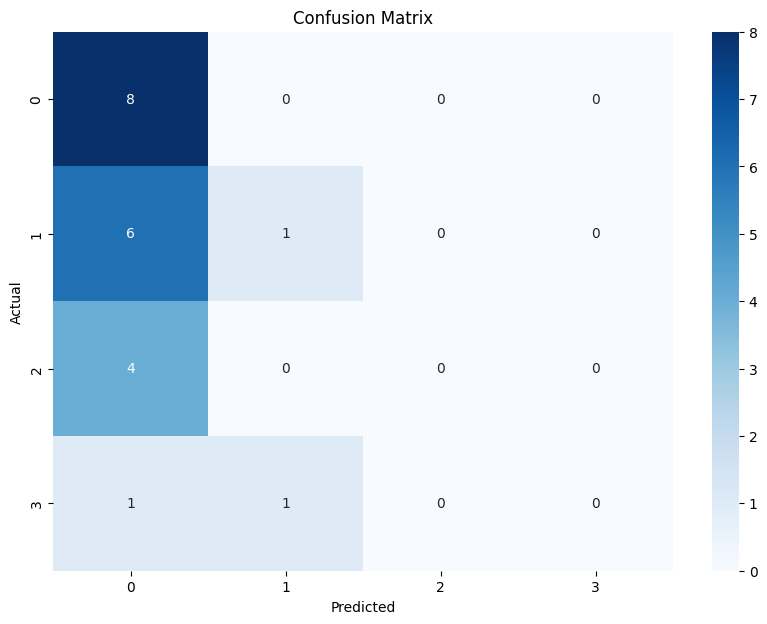

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [14]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")

## Plot feature importances
#importances = best_model.feature_importances_
#indices = np.argsort(importances)[::-1]

#plt.figure(figsize=(10, 6))
#plt.title("Feature Importances")
#plt.bar(range(X.shape), importances[indices], align="center")
#plt.xticks(range(X.shape), X.columns[indices], rotation=90)
#plt.xlim([-1, X.shape])
#plt.show()

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.60
Accuracy of the SVM model with tuned parameters: 0.43

Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.14      0.25         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.35      0.29      0.21        21
weighted avg       0.49      0.43      0.30        21



C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dagin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

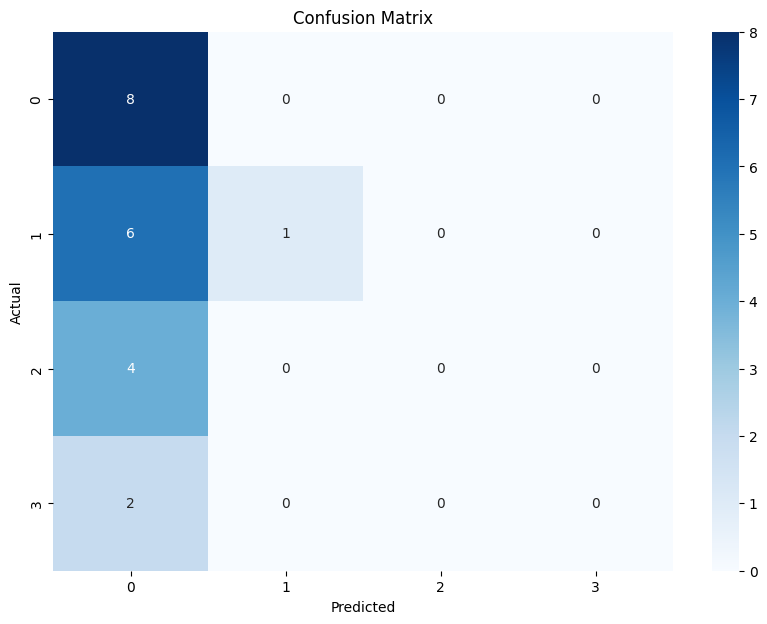

Number of classes in y_test does not match the number of columns in y_pred_proba.


In [16]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Use StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform grid search with stratified cross-validation
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Train an SVM model with tuned parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model with tuned parameters: {accuracy:.2f}")

# Print classification report and confusion matrix for detailed analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print ROC-AUC score
y_pred_proba = best_model.predict_proba(X_test)
if y_pred_proba.shape == len(np.unique(y_test)):
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.2f}")
else:
    print("Number of classes in y_test does not match the number of columns in y_pred_proba.")